In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd


In [0]:
import sys
import os

In [0]:
sys.path.insert(1, os.path.join('drive','My Drive','Social_Rec'))

In [0]:
#import dill 
import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
import pickle
import numpy as np
import time
import random
from collections import defaultdict
from UV_Encoders import UV_Encoder
from UV_Aggregators import UV_Aggregator
from Social_Encoders import Social_Encoder
from Social_Aggregators import Social_Aggregator
import torch.nn.functional as F
import torch.utils.data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import datetime
import argparse
import os
from time import time

from sklearn.preprocessing import LabelEncoder


In [0]:
"""
## toy dataset 
history_u_lists, history_ur_lists:  user's purchased history (item set in training set), and his/her rating score (dict)
history_v_lists, history_vr_lists:  user set (in training set) who have interacted with the item, and rating score (dict)

train_u, train_v, train_r: training_set (user, item, rating)
test_u, test_v, test_r: testing set (user, item, rating)

# please add the validation set

social_adj_lists: user's connected neighborhoods
ratings_list: rating value from 0.5 to 4.0 (8 opinion embeddings)
"""

"\n## toy dataset \nhistory_u_lists, history_ur_lists:  user's purchased history (item set in training set), and his/her rating score (dict)\nhistory_v_lists, history_vr_lists:  user set (in training set) who have interacted with the item, and rating score (dict)\n\ntrain_u, train_v, train_r: training_set (user, item, rating)\ntest_u, test_v, test_r: testing set (user, item, rating)\n\n# please add the validation set\n\nsocial_adj_lists: user's connected neighborhoods\nratings_list: rating value from 0.5 to 4.0 (8 opinion embeddings)\n"

In [0]:
dir_data = './data/toy_dataset'

path_data = dir_data + ".pickle"
data_file = open(path_data, 'rb')
history_u_lists_, history_ur_lists_, history_v_lists_, history_vr_lists_, train_u_, train_v_, train_r_, test_u_, test_v_, test_r_, social_adj_lists_, ratings_list_ = pickle.load(
    data_file)

In [0]:
mat = loadmat('datasets/rating.mat')  # load mat-file
mdata = mat['rating']  # variable in mat file


In [0]:
mat_net = loadmat('datasets/trustnetwork.mat')  # load mat-file
mnet = mat_net['trustnetwork']  # variable in mat file


In [0]:
mnet = mnet[~((mnet[:,0] == 21354) +  (mnet[:,1] == 21354))]
mnet_un = np.unique(np.r_[mnet[:,0], mnet[:,1]])

In [0]:
fr_mask = np.isin(mdata[:,0], mnet_un)
mdata = mdata[fr_mask]

In [0]:
user_encoder = LabelEncoder()
mdata[:, 0] = user_encoder.fit_transform(mdata[:, 0])
fr1 = user_encoder.transform(mnet[:,0])
fr2 = user_encoder.transform(mnet[:,1])

In [0]:
item_encoder = LabelEncoder()
mdata[:, 1] = item_encoder.fit_transform(mdata[:, 1])

In [0]:
mdata[:,3] -= 1

In [0]:
social_adj_lists = defaultdict(set)
for pair in zip(fr1, fr2):
    social_adj_lists[pair[0]].add(pair[1])
    social_adj_lists[pair[1]].add(pair[0])

len(list(social_adj_lists.keys())) / np.max(user_encoder.classes_)

0.8164305693404313

In [0]:
mdata.shape

(764693, 4)

In [0]:
for pair in mnet:
    if not (set(history_u_lists[pair[0]]) ^ set(history_u_lists[pair[1]])):
        print(pair)
        #print(history_ur_lists[pair[0]])
        print(np.count_nonzero(np.array(history_ur_lists[pair[0]]) - np.array(history_ur_lists[pair[1]])==0))

[5369 5369]
34
[2760 2760]
17
[19950 20240]
0
[21418 20240]
0
[18751 20240]
0
[20636 20240]
0
[18767 20240]
0
[18610 20240]
0
[18593 20240]
0
[18555 20240]
0
[20775 20240]
0
[18673 20240]
0
[18620 20240]
0
[20691 20240]
0
[18334 20240]
0
[21704 20240]
0
[21795 20240]
0
[21727 20240]
0
[19826 20240]
0
[20460 20240]
0
[19542 20240]
0
[20281 20240]
0
[18219 20240]
0
[18605 20240]
0
[19078 20240]
0
[20142 20240]
0
[21077 20240]
0
[20196 20240]
0
[19851 20240]
0
[22063 20240]
0
[21245 20240]
0
[20608 20240]
0
[18365 20240]
0
[21700 20240]
0
[18930 20240]
0
[20643 20240]
0
[20012 20240]
0
[19016 20240]
0
[18188 20240]
0
[21448 20240]
0
[18875 20240]
0
[20240 20240]
0
[19837 20240]
0
[20830 20240]
0
[19440 20240]
0
[18548 20240]
0
[20128 20240]
0
[18220 20240]
0
[20922 20240]
0
[21863 20240]
0
[18588 20240]
0
[19040 20240]
0
[18364 20240]
0
[19012 20240]
0
[21405 20240]
0
[19631 20240]
0
[20151 20240]
0
[19896 20240]
0
[21094 20240]
0
[19482 20240]
0
[19800 20240]
0
[21022 20240]
0
[19228 202

0
[22001 19162]
0
[18403 19162]
0
[20054 19162]
0
[20359 19162]
0
[21405 19162]
0
[19800 19162]
0
[19464 19162]
0
[18787 19162]
0
[20793 19162]
0
[20293 19162]
0
[18230 19162]
0
[18902 19162]
0
[20207 19162]
0
[20473 19162]
0
[20772 19162]
0
[21834 19162]
0
[20511 19162]
0
[19481 19162]
0
[21789 19162]
0
[18682 19162]
0
[19378 19162]
0
[19470 19162]
0
[20190 19162]
0
[21420 19162]
0
[18921 19162]
0
[21809 19162]
0
[21754 19162]
0
[20988 19162]
0
[18448 19162]
0
[18527 19162]
0
[21537 19162]
0
[20172 19162]
0
[18724 20151]
0
[18620 20151]
0
[20367 20151]
0
[18170 20151]
0
[20128 20151]
0
[19127 20151]
0
[19482 20151]
0
[21094 20151]
0
[21704 20151]
0
[21133 20151]
0
[19162 20151]
0
[20643 20151]
0
[18403 20151]
0
[20240 20151]
0
[21872 20151]
0
[19896 20151]
0
[20287 20151]
0
[21465 20151]
0
[19191 20151]
0
[21789 20151]
0
[21022 20151]
0
[19459 20151]
0
[18902 20151]
0
[21448 20151]
0
[12505 12505]
50
[20460 19504]
0
[21744 19504]
0
[18555 19504]
0
[19956 19504]
0
[19485 19504]
0
[1875

[18838 21682]
0
[21575 21682]
0
[18500 21682]
0
[20715 21682]
0
[20278 21682]
0
[19683 21682]
0
[19573 21682]
0
[22110 21682]
0
[20242 21682]
0
[20660 21682]
0
[21851 21682]
0
[19408 21682]
0
[20665 21682]
0
[19464 21682]
0
[20194 21682]
0
[19895 21682]
0
[18308 21682]
0
[20428 21682]
0
[21627 21682]
0
[19854 21682]
0
[19173 21682]
0
[20136 21682]
0
[18667 21682]
0
[21404 21682]
0
[18528 21682]
0
[20812 21682]
0
[22057 21682]
0
[18787 21682]
0
[19376 21682]
0
[18870 21682]
0
[21642 21682]
0
[19437 21682]
0
[18724 20470]
0
[20636 20470]
0
[19950 20470]
0
[18593 20470]
0
[20128 20470]
0
[19956 20470]
0
[18620 20470]
0
[20460 20470]
0
[18929 20470]
0
[18666 20470]
0
[20953 20470]
0
[20976 20470]
0
[21863 20470]
0
[20932 20470]
0
[21555 20470]
0
[18866 20470]
0
[19382 20470]
0
[20608 20470]
0
[19440 20470]
0
[21450 20470]
0
[21495 20470]
0
[18796 20470]
0
[19896 20470]
0
[20036 20470]
0
[18475 20470]
0
[21968 20470]
0
[19191 20470]
0
[21314 20470]
0
[20621 20470]
0
[19810 20470]
0
[20986 2

[21928 20278]
0
[21993 20278]
0
[20428 20278]
0
[18594 20278]
0
[21627 20278]
0
[21641 20278]
0
[18365 20278]
0
[21217 20278]
0
[21635 20278]
0
[19935 20278]
0
[18927 20278]
0
[18948 20278]
0
[18528 20278]
0
[21443 20278]
0
[21233 20278]
0
[20748 20278]
0
[19762 20278]
0
[21113 20278]
0
[18224 20278]
0
[19796 20278]
0
[19335 20278]
0
[20931 20278]
0
[19451 20278]
0
[19364 20278]
0
[18454 20278]
0
[19825 20278]
0
[21448 20278]
0
[18463 20278]
0
[20493 20278]
0
[18313 20278]
0
[20727 20278]
0
[18235 20278]
0
[21310 20278]
0
[5550 5550]
32
[21203 18464]
0
[19018 18464]
0
[21842 18464]
0
[18872 18464]
0
[18796 18464]
0
[21020 18464]
0
[19650 18464]
0
[19189 18464]
0
[20472 18464]
0
[20701 18464]
0
[19855 18464]
0
[18908 18464]
0
[21838 18464]
0
[21431 18464]
0
[19481 18464]
0
[18764 18464]
0
[22033 18464]
0
[21476 18464]
0
[21814 18464]
0
[19895 18464]
0
[20762 18464]
0
[21320 18464]
0
[19837 18464]
0
[18799 18464]
0
[21636 18464]
0
[18948 18464]
0
[18874 18464]
0
[20488 18464]
0
[22019 18

0
[18176 21022]
0
[20338 21022]
0
[21295 21022]
0
[20260 21022]
0
[20287 21022]
0
[19282 21022]
0
[19365 21022]
0
[21147 21022]
0
[18796 21022]
0
[20036 21022]
0
[19127 21022]
0
[18484 21022]
0
[20520 21022]
0
[19482 21022]
0
[18866 21022]
0
[21465 21022]
0
[19228 21022]
0
[20832 21022]
0
[20151 21022]
0
[18359 21022]
0
[19191 21022]
0
[19162 21022]
0
[18292 21022]
0
[21834 21022]
0
[19412 21022]
0
[20359 21022]
0
[21314 21022]
0
[20981 21022]
0
[18723 21022]
0
[19459 21022]
0
[18220 21022]
0
[18247 21022]
0
[19527 21022]
0
[19102 21022]
0
[20157 18403]
0
[20533 18403]
0
[19896 18403]
0
[19034 18403]
0
[21082 18403]
0
[18724 18403]
0
[20378 18403]
0
[20161 18403]
0
[19081 18403]
0
[20530 18403]
0
[21418 18403]
0
[19950 18403]
0
[20281 18403]
0
[20460 18403]
0
[19672 18403]
0
[18945 18403]
0
[22022 18403]
0
[20322 18403]
0
[19485 18403]
0
[20775 18403]
0
[18555 18403]
0
[19994 18403]
0
[18673 18403]
0
[19947 18403]
0
[18620 18403]
0
[20608 18403]
0
[20128 18403]
0
[18219 18403]
0
[19078

0
[22049 20636]
0
[19837 20636]
0
[19002 20636]
0
[19097 20636]
0
[19936 20636]
0
[22055 20636]
0
[19096 20636]
0
[21233 20636]
0
[19586 20636]
0
[21113 20636]
0
[20014 20636]
0
[19335 20636]
0
[18132 20636]
0
[22145 20636]
0
[19349 20636]
0
[19170 20636]
0
[21812 19607]
0
[18620 19607]
0
[21370 19607]
0
[18219 19607]
0
[18929 19607]
0
[19837 19607]
0
[19896 19607]
0
[21077 19607]
0
[18188 19607]
0
[19191 19607]
0
[19113 19607]
0
[19429 19607]
0
[21082 19607]
0
[19536 19607]
0
[19841 19607]
0
[18787 19607]
0
[18414 19607]
0
[18535 19607]
0
[19486 19798]
0
[19482 19798]
0
[18403 19798]
0
[18364 19798]
0
[21405 19798]
0
[20050 19798]
0
[19277 19798]
0
[22138 19798]
0
[19005 19798]
0
[21542 19798]
0
[21245 19798]
0
[19481 19798]
0
[19885 19798]
0
[21975 19798]
0
[21448 19798]
0
[21143 19798]
0
[18948 19798]
0
[19459 19798]
0
[18527 19798]
0
[18258 19798]
0
[18603 19798]
0
[19855 19798]
0
[20190 19798]
0
[21928 19798]
0
[20240 19798]
0
[20574 19798]
0
[21754 19798]
0
[18224 19798]
0
[19811

[19291 21020]
0
[19172 21020]
0
[21645 21020]
0
[20700 21020]
0
[20410 21020]
0
[19676 21020]
0
[18313 21020]
0
[20156 20981]
0
[18563 20981]
0
[20743 20981]
0
[18620 20981]
0
[18219 20981]
0
[20981 20981]
0
[21700 20981]
0
[19386 20981]
0
[21459 20981]
0
[18866 20981]
0
[21555 20981]
0
[21066 20981]
0
[18930 20981]
0
[22063 20981]
0
[20968 20981]
0
[19631 20981]
0
[18188 20981]
0
[19885 20981]
0
[20157 20981]
0
[20287 20981]
0
[19191 20981]
0
[19235 20981]
0
[18220 20981]
0
[20385 20981]
0
[20152 20981]
0
[18555 22001]
0
[18620 22001]
0
[19440 22001]
0
[18403 22001]
0
[21744 22001]
0
[20142 22001]
0
[18875 22001]
0
[20240 22001]
0
[18892 22001]
0
[19837 22001]
0
[21955 22001]
0
[19191 22001]
0
[21324 22001]
0
[18682 22001]
0
[21186 22001]
0
[20494 22001]
0
[21473 22001]
0
[21554 22001]
0
[20577 22001]
0
[18448 22001]
0
[19481 22001]
0
[19885 22001]
0
[19798 22001]
0
[19774 22001]
0
[20960 22001]
0
[18167 22001]
0
[18224 22001]
0
[20277 22001]
0
[18710 22001]
0
[20995 22001]
0
[20987 2

[21708 18489]
0
[20578 18489]
0
[21956 18489]
0
[20359 18489]
0
[20959 18489]
0
[20171 18489]
0
[19800 18489]
0
[19481 18489]
0
[21534 18489]
0
[19464 18489]
0
[18317 18489]
0
[20470 18489]
0
[20853 18489]
0
[21754 21052]
0
[20293 21052]
0
[18725 21052]
0
[21872 21733]
0
[18930 21733]
0
[19282 21733]
0
[19054 21733]
0
[18220 21733]
0
[21241 18535]
0
[18247 18535]
0
[21147 18535]
0
[20520 18535]
0
[18872 18535]
0
[19191 18535]
0
[22029 18535]
0
[21245 18535]
0
[21022 18535]
0
[19102 18535]
0
[21994 18535]
0
[21314 18535]
0
[18399 18535]
0
[21812 18535]
0
[21186 18535]
0
[18716 18535]
0
[21798 18535]
0
[21890 18535]
0
[21473 18535]
0
[18261 18535]
0
[18714 18535]
0
[19005 18535]
0
[19383 18535]
0
[20122 18535]
0
[18739 18535]
0
[19424 18535]
0
[21228 18535]
0
[20296 18535]
0
[21826 18535]
0
[19429 18535]
0
[20046 18535]
0
[21946 18535]
0
[21186 19855]
0
[21860 19855]
0
[20772 19855]
0
[19646 19855]
0
[21981 19855]
0
[20108 19855]
0
[18527 19855]
0
[18211 19855]
0
[19160 19855]
0
[18250 1

0
[18947 21789]
0
[22011 21789]
0
[21832 18787]
0
[20953 18787]
0
[18475 18787]
0
[18421 18787]
0
[19191 18787]
0
[21249 18787]
0
[19408 18787]
0
[18866 18787]
0
[21963 18787]
0
[19844 18787]
0
[21172 18787]
0
[18317 18787]
0
[20743 18787]
0
[21405 18787]
0
[19885 18787]
0
[19898 18787]
0
[21812 18787]
0
[19162 18787]
0
[18776 18787]
0
[21834 18787]
0
[21060 18787]
0
[18203 18787]
0
[18636 18787]
0
[19494 18787]
0
[21073 18787]
0
[18603 18787]
0
[19271 18787]
0
[20745 18787]
0
[20544 18787]
0
[22000 18787]
0
[21789 18787]
0
[19169 18787]
0
[18492 18787]
0
[21197 18787]
0
[20207 18787]
0
[18500 18787]
0
[21089 18787]
0
[19378 18787]
0
[21997 18787]
0
[21754 18787]
0
[19646 18787]
0
[19425 18787]
0
[18527 18787]
0
[19536 18787]
0
[21648 18787]
0
[19650 18787]
0
[20372 18787]
0
[19855 18787]
0
[18529 18787]
0
[21318 18787]
0
[18668 18787]
0
[20050 18787]
0
[18741 18787]
0
[18448 18787]
0
[19468 18787]
0
[20355 18787]
0
[21645 18787]
0
[21350 18787]
0
[21082 18787]
0
[20812 18787]
0
[20014

0
[21459 20643]
0
[20157 20643]
0
[21834 20643]
0
[21599 20643]
0
[20240 20643]
0
[20287 20643]
0
[19440 20643]
0
[20116 20643]
0
[21909 20643]
0
[19885 20643]
0
[21262 20643]
0
[20036 20643]
0
[21226 20643]
0
[19313 20643]
0
[21249 20643]
0
[19244 20643]
0
[20128 20643]
0
[19282 20643]
0
[19191 20643]
0
[19429 20643]
0
[19481 20643]
0
[19235 20643]
0
[21963 20643]
0
[21956 20643]
0
[18620 18475]
0
[19344 18475]
0
[20981 18475]
0
[21154 18475]
0
[18930 18475]
0
[18875 18475]
0
[19885 18475]
0
[18818 18475]
0
[20289 18475]
0
[20287 18475]
0
[18852 18475]
0
[21956 18475]
0
[19716 18475]
0
[19482 18475]
0
[21245 18475]
0
[18892 18475]
0
[20059 18475]
0
[19191 18475]
0
[18484 18475]
0
[20470 18475]
0
[20643 18475]
0
[20743 18475]
0
[21249 18475]
0
[19162 18475]
0
[21955 18475]
0
[18620 20355]
0
[21249 20355]
0
[21683 20355]
0
[19939 20355]
0
[18292 20355]
0
[19060 20355]
0
[21834 20355]
0
[19386 20355]
0
[20549 20355]
0
[20960 20355]
0
[18809 20355]
0
[21519 20355]
0
[21145 20355]
0
[19650

[18235 18841]
0
[18402 18841]
0
[18188 19553]
0
[19054 19553]
0
[21495 19553]
0
[19481 19553]
0
[20408 19553]
0
[20220 19553]
0
[21713 19553]
0
[21596 19553]
0
[20072 20381]
0
[21507 20381]
0
[19832 20381]
0
[18866 20381]
0
[19191 20381]
0
[19282 20381]
0
[21834 20381]
0
[19020 20381]
0
[21249 20381]
0
[21956 20381]
0
[20578 20381]
0
[21716 20381]
0
[19060 20381]
0
[18840 20381]
0
[20207 20381]
0
[20449 20381]
0
[18987 20381]
0
[18292 19714]
0
[19244 19714]
0
[21789 19714]
0
[19060 19714]
0
[19005 19714]
0
[21569 19714]
0
[21643 19714]
0
[18838 19714]
0
[21765 19714]
0
[19187 19714]
0
[18725 19714]
0
[21093 19056]
0
[18987 19056]
0
[21754 19056]
0
[21542 19056]
0
[20549 19056]
0
[18126 19056]
0
[19486 19056]
0
[20973 19056]
0
[20389 19056]
0
[19955 19056]
0
[20855 19056]
0
[18725 19056]
0
[19511 19056]
0
[19304 19056]
0
[19206 19056]
0
[20287 21909]
0
[21495 21909]
0
[19083 21909]
0
[20128 21909]
0
[19837 21909]
0
[21856 21909]
0
[21286 19999]
0
[19536 19999]
0
[19622 19999]
0
[20701 1

[19339 21908]
0
[18121 21908]
0
[20384 21908]
0
[20264 21908]
0
[19978 21908]
0
[18725 21891]
0
[20157 20917]
0
[5196 5196]
14
[18550 18913]
0
[21145 19359]
0
[21431 19359]
0
[19004 21535]
0
[18142 21535]
0
[19355 21535]
0
[21766 21535]
0
[18111 21535]
0
[21768 21535]
0
[21847 21535]
0
[18660 21535]
0
[19079 18591]
0
[18192 18881]
0
[21367 18881]
0
[19916 18881]
0
[20933 18881]
0
[18164 18881]
0
[18372 18881]
0
[18545 18881]
0
[19837 18881]
0
[20762 21184]
0
[19175 21184]
0
[19269 19269]
0
[20823 19269]
0
[19536 19269]
0
[18529 19269]
0
[21306 19269]
0
[18708 19269]
0
[21887 19269]
0
[22137 19269]
0
[18108 19269]
0
[18474 19269]
0
[18725 19269]
0
[22145 19269]
0
[21078 18850]
0
[18636 18850]
0
[22060 18850]
0
[21140 18850]
0
[19967 18850]
0
[21104 18850]
0
[18487 18850]
0
[22145 18850]
0
[22038 18850]
0
[19241 18467]
0
[21210 18467]
0
[21078 18467]
0
[21648 18467]
0
[18550 18467]
0
[21532 20455]
0
[20506 20455]
0
[19896 20455]
0
[20492 20455]
0
[21198 20455]
0
[19855 20455]
0
[19567 20

0
[19459 18106]
0
[19794 18106]
0
[18764 18106]
0
[18573 18106]
0
[21682 18106]
0
[19408 18106]
0
[20587 18106]
0
[21911 18106]
0
[20584 18106]
0
[19807 18106]
0
[20624 18106]
0
[21378 18106]
0
[18481 18106]
0
[21473 18106]
0
[19322 18106]
0
[21542 21819]
0
[19486 21819]
0
[19056 21819]
0
[21073 19663]
0
[18256 19663]
0
[19529 19663]
0
[21963 21610]
0
[20988 21610]
0
[22138 21610]
0
[21889 21610]
0
[21534 21610]
0
[19308 21610]
0
[21143 19700]
0
[20468 19700]
0
[19986 19700]
0
[20814 18917]
0
[20565 18255]
0
[19924 18255]
0
[19838 18255]
0
[19269 21887]
0
[20833 21887]
0
[21431 21887]
0
[20715 21887]
0
[20587 21887]
0
[19393 21887]
0
[19895 21887]
0
[21097 21887]
0
[20990 21887]
0
[19586 21887]
0
[19762 21887]
0
[20812 21887]
0
[22145 21887]
0
[19557 21887]
0
[18224 21575]
0
[18492 21575]
0
[19552 21575]
0
[19963 21575]
0
[19166 21575]
0
[20817 21575]
0
[22058 21575]
0
[19481 21575]
0
[19486 21575]
0
[21682 21575]
0
[19468 21575]
0
[19464 21575]
0
[21097 21575]
0
[21887 21575]
0
[21388

0
[21648 18616]
0
[18802 18616]
0
[18326 18616]
0
[18725 18616]
0
[18850 18616]
0
[22145 18616]
0
[3669 3669]
19
[20472 20241]
0
[18477 20241]
0
[18323 20241]
0
[18467 20241]
0
[20359 19588]
0
[19191 19588]
0
[18219 19067]
0
[19244 19067]
0
[20016 19587]
0
[20534 19587]
0
[19588 19587]
0
[21324 19587]
0
[18840 19587]
0
[20677 19587]
0
[21715 19587]
0
[19326 19587]
0
[21864 19587]
0
[19832 18260]
0
[18359 18260]
0
[18292 19069]
0
[19750 19330]
0
[18934 19330]
0
[18760 19330]
0
[19191 22116]
0
[21507 18761]
0
[18521 18761]
0
[18176 18761]
0
[19191 18761]
0
[18334 18761]
0
[21066 18761]
0
[18292 20737]
0
[19020 20737]
0
[21168 20737]
0
[10734 10734]
12
[6285 6285]
16
[19412 20072]
0
[20381 20072]
0
[18654 19121]
0
[18292 20644]
0
[18802 20644]
0
[18487 19624]
0
[18877 19624]
0
[18195 22128]
0
[19896 22128]
0
[20986 22128]
0
[18292 18846]
0
[20983 21318]
0
[20610 21318]
0
[21308 21318]
0
[19646 21318]
0
[19837 21318]
0
[18921 21318]
0
[21731 21318]
0
[20411 21318]
0
[18636 21318]
0
[18454 

[20695 20401]
0
[21137 19989]
0
[18695 19291]
0
[18111 19291]
0
[3732 3732]
34
[18909 18322]
0
[19978 18322]
0
[20433 18322]
0
[19608 18322]
0
[20608 20396]
0
[19482 20396]
0
[18213 18764]
0
[20154 18764]
0
[20939 18764]
0
[21448 18764]
0
[20621 19909]
0
[19555 19909]
0
[19040 19909]
0
[20959 19909]
0
[19896 19909]
0
[20853 19909]
0
[20220 21042]
0
[19229 21042]
0
[21834 20627]
0
[21226 20627]
0
[21465 20627]
0
[18723 20627]
0
[18237 20627]
0
[20460 20932]
0
[19950 20932]
0
[18843 20932]
0
[21418 20932]
0
[19481 20932]
0
[20470 20932]
0
[20608 20932]
0
[21683 21816]
0
[18462 22078]
0
[19273 22078]
0
[18725 22038]
0
[18850 22038]
0
[22145 22038]
0
[18620 21480]
0
[21726 21480]
0
[21411 21596]
0
[19553 21596]
0
[21975 21596]
0
[18102 21596]
0
[21713 21596]
0
[19160 21596]
0
[20097 21596]
0
[20647 21596]
0
[20309 21596]
0
[19837 21596]
0
[21448 20508]
0
[22038 20508]
0
[15732 15732]
17
[18725 20316]
0
[19191 19558]
0
[20176 19558]
0
[20097 19558]
0
[18739 19289]
0
[21448 19289]
0
[19924 1

[18160 19403]
0
[19895 19403]
0
[22145 19403]
0
[20224 19243]
0
[18884 22124]
0
[19479 22124]
0
[19309 22124]
0
[19149 22124]
0
[18249 22124]
0
[18992 22124]
0
[19177 22124]
0
[21598 22124]
0
[18520 22124]
0
[18725 18983]
0
[21006 21335]
0
[22068 21335]
0
[19566 19946]
0
[21786 19946]
0
[18226 19946]
0
[19895 19946]
0
[21145 18589]
0
[19863 18732]
0
[18226 18732]
0
[19946 18732]
0
[19895 18732]
0
[21925 18732]
0
[21794 18223]
0
[18650 18223]
0
[19722 19850]
0
[19556 19850]
0
[21522 19850]
0
[21359 21658]
0
[20480 21658]
0
[20349 21658]
0
[21851 21658]
0
[20245 21658]
0
[21392 21658]
0
[22145 21621]
0
[19722 19273]
0
[21332 19273]
0
[21532 19273]
0
[20462 19273]
0
[18948 19273]
0
[21187 19273]
0
[21104 19273]
0
[22145 19273]
0
[21765 19273]
0
[19559 19273]
0
[22078 19273]
0
[20487 19273]
0
[18111 21173]
0
[20350 21173]
0
[20785 20548]
0
[19506 20273]
0
[21376 20273]
0
[19420 19838]
0
[20508 19838]
0
[20587 18749]
0
[21875 21308]
0
[20701 21308]
0
[19243 21308]
0
[18304 21308]
0
[22114 2

0
[19032 21635]
0
[21431 20294]
0
[19916 20294]
0
[19736 20294]
0
[22112 21959]
0
[13127 13127]
31
[21765 21536]
0
[18776 19378]
0
[19378 19378]
0
[19685 19378]
0
[20207 19378]
0
[18206 19378]
0
[18787 19378]
0
[20988 19378]
0
[19855 19378]
0
[19470 19378]
0
[21754 19378]
0
[20198 19378]
0
[19175 19378]
0
[21487 19378]
0
[20553 19386]
0
[21713 19386]
0
[19885 19386]
0
[21834 19375]
0
[21690 21064]
0
[18448 18237]
0
[19837 18237]
0
[20059 20577]
0
[19040 20577]
0
[20389 20911]
0
[18462 19689]
0
[19507 20820]
0
[22145 20820]
0
[21693 19525]
0
[19032 19525]
0
[20766 19525]
0
[21754 22098]
0
[19879 22098]
0
[20054 22052]
0
[19936 22052]
0
[21228 22052]
0
[19364 22052]
0
[18725 22052]
0
[14377 14377]
19
[20758 18811]
0
[21431 18811]
0
[5042 5042]
147
[20584 21624]
0
[21925 21389]
0
[21324 21389]
0
[21156 20745]
0
[19262 20745]
0
[19550 20745]
0
[19018 20745]
0
[21933 21770]
0
[21765 21190]
0
[19484 20027]
0
[18725 21255]
0
[22145 18272]
0
[18747 18272]
0
[19608 18539]
0
[19243 21442]
0
[216

0
[18725 21098]
0
[5925 5925]
11
[20011 19784]
0
[20758 19784]
0
[21030 19784]
0
[21584 19784]
0
[18151 19784]
0
[18520 19784]
0
[19663 22040]
0
[18256 22040]
0
[19239 18863]
0
[20695 19905]
0
[20828 19905]
0
[21431 19916]
0
[21030 19916]
0
[20595 19916]
0
[20732 19916]
0
[20294 19916]
0
[21784 22147]
0
[19937 18455]
0
[20828 18455]
0
[19657 19621]
0
[19518 21223]
0
[18455 19661]
0
[20243 19661]
0
[21162 20437]
0
[20292 21213]
0
[19105 21213]
0
[21680 21213]
0
[18179 21556]
0
[21979 18928]
0
[19796 20804]
0
[21116 20358]
0
[19978 20358]
0
[19837 20358]
0
[21437 19614]
0
[19392 18109]
0
[21939 18109]
0
[20565 18109]
0
[19924 18109]
0
[21784 20183]
0
[21033 19133]
0
[18592 20599]
0
[18538 20599]
0
[18111 19584]
0
[19236 19584]
0
[21024 20388]
0
[18324 20388]
0
[21901 19380]
0
[21302 20479]
0
[21188 18650]
0
[21116 18650]
0
[18650 21794]
0
[21627 20279]
0
[18386 18431]
0
[21095 20056]
0
[19849 20056]
0
[22145 21915]
0
[21006 21455]
0
[21006 21930]
0
[21658 21930]
0
[22035 20784]
0
[18111 

In [0]:
?np.nonzero()

In [0]:
mdata[:,1].max()

261678

In [0]:
history_u_lists = defaultdict(list)
history_ur_lists = defaultdict(list)
history_v_lists = defaultdict(list)
history_vr_lists = defaultdict(list)

for i, record in enumerate(mdata):
    user, item, cat, rating = record
    history_u_lists[user].append(item)
    
    history_ur_lists[user].append(rating)
    
    history_v_lists[item].append(user)
    
    history_vr_lists[item].append(rating)
    
    if i%50000 == 0:
        print(i)
    
   

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000


In [0]:
lst_len_v = list()
for k, a in history_v_lists.items():
    #print(a)
    #print()
    lst_len_v.append(len(a))

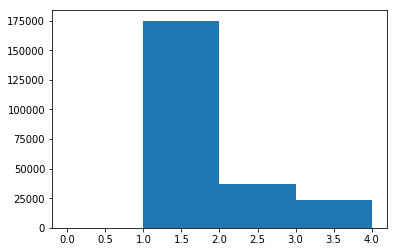

In [0]:
plt.hist(lst_len_v, bins=range(0, 5))
plt.show()

In [0]:
num_rec = mdata.shape[0] 
item_un = np.unique(mdata[:,1], return_index=True)[1]
user_un = np.unique(mdata[:,0], return_index=True)[1]

In [0]:
tr_frac = 0.8
uniq_rec = np.union1d(item_un, user_un)
available_rec = np.setdiff1d(np.arange(num_rec), uniq_rec)
available_rec_tr_num = int(num_rec*tr_frac - len(uniq_rec))
train_ind = np.random.choice(available_rec, size=available_rec_tr_num, replace=False)
train_ind = np.union1d(train_ind, uniq_rec)

test_ind = np.nonzero(~np.isin(np.arange(num_rec), train_ind))[0]

In [0]:
train_u, train_v, train_r = [], [], []
#train_ind = np.arange(num_rec)
for record in mdata:#[train_ind]:
    user, item, cat, rat = record
    
    train_u.append(user)
    train_v.append(item)
    train_r.append(rat)                

In [0]:
test_u, test_v, test_r = [], [], []
for record in mdata[test_ind]:
    user, item, cat, rat = record
    test_u.append(user)
    test_v.append(item)
    test_r.append(rat)        

In [0]:
path_data = dir_data + ".pickle"
data_file = open(path_data, 'rb')
history_u_lists, history_ur_lists, history_v_lists, history_vr_lists, train_u, train_v, train_r, test_u, test_v, test_r, social_adj_lists, ratings_list = pickle.load(
    data_file)

In [0]:
import os
import numpy as np
#import igraph
import itertools
from scipy import sparse as sp

In [0]:
path_data = os.path.join('drive', 'My Drive', 'Attentive_Group_Recommendation_master', 'data', 'CAMRa2011')

In [0]:
l1 = []
l2 = []
mnet = (l1, l2)
dict_gr = {}

In [0]:
with open(os.path.join(path_data, 'groupMember.txt')) as f:
    for i_, line in enumerate(f.readlines()):
        gr, users = line.split()
        splitted = [int(k) for k in users.split(',')]
        dict_gr[int(gr)] = set(splitted)
        for us in itertools.combinations(splitted, 2):
            l1.append(us[0])
            l2.append(us[1])
            
            #l2.append(us[0])
            #l1.append(us[1])
            
mnet = np.array(mnet).reshape(-1, 2)

In [0]:
social_adj_lists = defaultdict(set)
for pair in zip(mnet[:,0], mnet[:,1]):
    social_adj_lists[pair[0]].add(pair[1])
    social_adj_lists[pair[1]].add(pair[0])

In [0]:
history_u_lists = defaultdict(list)
history_ur_lists = defaultdict(list)
history_v_lists = defaultdict(list)
history_vr_lists = defaultdict(list)

train_u, train_v, train_r = [], [], []
with open(os.path.join(path_data, 'userRatingTrain.txt')) as f:
    for i_, line in enumerate(f.readlines()):
        u, i, r = map(int, line.split())
        r = int(r/20)
        #i = int(le.transform([i]))
        
        history_u_lists[u].append(i)
        history_ur_lists[u].append(r)
        history_v_lists[i].append(u)
        history_vr_lists[i].append(r)
        
        
        train_u.append(u)
        train_v.append(i)
        train_r.append(r)

with open(os.path.join(path_data, 'groupRatingTrain.txt')) as f:
    for i_, line in enumerate(f.readlines()):
        gr, i, r = map(int, line.split())
        r = int(r/20)
        #i = int(le.transform([i]))
        
        for u in dict_gr[gr]:    
            history_u_lists[u].append(i)
            history_ur_lists[u].append(r)
            history_v_lists[i].append(u)
            history_vr_lists[i].append(r)
            
            train_u.append(u)
            train_v.append(i)
            train_r.append(r)

In [0]:
all_items = np.unique(np.array(train_v))

In [0]:
le = LabelEncoder().fit(all_items)

In [0]:
history_u_lists = defaultdict(list)
history_ur_lists = defaultdict(list)
history_v_lists = defaultdict(list)
history_vr_lists = defaultdict(list)

train_u, train_v, train_r = [], [], []
with open(os.path.join(path_data, 'userRatingTrain.txt')) as f:
    for i_, line in enumerate(f.readlines()):
        u, i, r = map(int, line.split())
        r = int(r/20)
        i = int(le.transform([i]))
        
        history_u_lists[u].append(i)
        history_ur_lists[u].append(r)
        history_v_lists[i].append(u)
        history_vr_lists[i].append(r)
        
        
        train_u.append(u)
        train_v.append(i)
        train_r.append(r)
        
with open(os.path.join(path_data, 'groupRatingTrain.txt')) as f:
    for i_, line in enumerate(f.readlines()):
        gr, i, r = map(int, line.split())
        r = int(r/20)
        i = int(le.transform([i]))
        
        for u in dict_gr[gr]:    
            history_u_lists[u].append(i)
            history_ur_lists[u].append(r)
            history_v_lists[i].append(u)
            history_vr_lists[i].append(r)
            
            train_u.append(u)
            train_v.append(i)
            train_r.append(r)

In [0]:
test_u, test_v, test_r = [], [], []
cnt_ = 0
idx_skip = []
with open(os.path.join(path_data, 'userRatingTest.txt')) as f:
    for i_, line in enumerate(f.readlines()):
        u, i, r = map(int, line.split())
        if i not in all_items:
            idx_skip.append(i_)
            cnt_ += 1
            continue
        i = int(le.transform([i]))
        r = int(r / 20)
        
        history_u_lists[u].append(i)
        history_ur_lists[u].append(r)
        history_v_lists[i].append(u)
        history_vr_lists[i].append(r)
        
        test_u.append(u)
        test_v.append(i)
        test_r.append(r)      
        

In [0]:
ratings_list = {i: i for i in range(0,6)}

In [26]:
ratings_list

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [0]:
"""
GraphRec: Graph Neural Networks for Social Recommendation. 
Wenqi Fan, Yao Ma, Qing Li, Yuan He, Eric Zhao, Jiliang Tang, and Dawei Yin. 
In Proceedings of the 28th International Conference on World Wide Web (WWW), 2019. Preprint[https://arxiv.org/abs/1902.07243]
If you use this code, please cite our paper:
```
@inproceedings{fan2019graph,
  title={Graph Neural Networks for Social Recommendation},
  author={Fan, Wenqi and Ma, Yao and Li, Qing and He, Yuan and Zhao, Eric and Tang, Jiliang and Yin, Dawei},
  booktitle={WWW},
  year={2019}
}
```
"""


class GraphRec(nn.Module):

    def __init__(self, enc_u, enc_v_history, r2e):
        super(GraphRec, self).__init__()
        self.enc_u = enc_u
        self.enc_v_history = enc_v_history
        self.embed_dim = enc_u.embed_dim

        self.w_ur1 = nn.Linear(self.embed_dim, self.embed_dim)
        self.w_ur2 = nn.Linear(self.embed_dim, self.embed_dim)
        self.w_vr1 = nn.Linear(self.embed_dim, self.embed_dim)
        self.w_vr2 = nn.Linear(self.embed_dim, self.embed_dim)
        self.w_uv1 = nn.Linear(self.embed_dim * 2, self.embed_dim)
        self.w_uv2 = nn.Linear(self.embed_dim, 16)
        self.w_uv3 = nn.Linear(16, 1)
        self.r2e = r2e
        self.bn1 = nn.BatchNorm1d(self.embed_dim, momentum=0.5)
        self.bn2 = nn.BatchNorm1d(self.embed_dim, momentum=0.5)
        self.bn3 = nn.BatchNorm1d(self.embed_dim, momentum=0.5)
        self.bn4 = nn.BatchNorm1d(16, momentum=0.5)
        self.criterion = nn.MSELoss()

    def forward(self, nodes_u, nodes_v):
        embeds_u = self.enc_u(nodes_u)
        #print(nodes_v)
        embeds_v = self.enc_v_history(nodes_v)

        x_u = F.relu(self.bn1(self.w_ur1(embeds_u)))
        x_u = F.dropout(x_u, training=self.training)
        x_u = self.w_ur2(x_u)
        x_v = F.relu(self.bn2(self.w_vr1(embeds_v)))
        x_v = F.dropout(x_v, training=self.training)
        x_v = self.w_vr2(x_v)

        x_uv = torch.cat((x_u, x_v), 1)
        x = F.relu(self.bn3(self.w_uv1(x_uv)))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.bn4(self.w_uv2(x)))
        x = F.dropout(x, training=self.training)
        scores = self.w_uv3(x)
        return scores.squeeze()

    def loss(self, nodes_u, nodes_v, labels_list):
        scores = self.forward(nodes_u, nodes_v)
        return self.criterion(scores, labels_list)


def train(model, device, train_loader, test_loader, optimizer, epoch, best_rmse, best_mae):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        batch_nodes_u, batch_nodes_v, labels_list = data
        optimizer.zero_grad()
        loss = model.loss(batch_nodes_u.to(device), batch_nodes_v.to(device), labels_list.to(device))
        loss.backward(retain_graph=True)
        optimizer.step()
        running_loss += loss.item()
        
        if i % 300 == 1:
            rmse, mae, r, m = test(graphrec, device, test_loader, np.array(lst_agree))
            print('[%d, %5d] loss: %.3f, The best rmse/mae: %.6f / %.6f' % (
                epoch, i, running_loss / 100, rmse, mae))
            print('The best WITH AGREE rmse/mae: %.6f / %.6f' %(r, m))
            running_loss = 0.0
        #if i >= 3000:
        #    break
    return 0


def test(model, device, test_loader, agree_preds):
    model.eval()
    tmp_pred = []
    target = []
    with torch.no_grad():
        for test_u, test_v, tmp_target in test_loader:
            test_u, test_v, tmp_target = test_u.to(device), test_v.to(device), tmp_target.to(device)
            val_output = model.forward(test_u, test_v)
            tmp_pred.append(list(val_output.data.cpu().numpy()))
            target.append(list(tmp_target.data.cpu().numpy()))
    tmp_pred = np.array(sum(tmp_pred, []))
    target = np.array(sum(target, []))
    expected_rmse = sqrt(mean_squared_error(tmp_pred, target))
    mae = mean_absolute_error(tmp_pred, target)

    rmse_with_agree = sqrt(mean_squared_error((tmp_pred + agree_preds)/2, target))
    mae_with_agree = mean_absolute_error((tmp_pred + agree_preds)/2, target)

    return expected_rmse, mae, rmse_with_agree, mae_with_agree

In [0]:
class Arg():
    def __init__(self):
        pass
args = Arg()   

"""
parser = argparse.ArgumentParser(description='Social Recommendation: GraphRec model')
parser.add_argument('--batch_size', type=int, default=128, metavar='N', help='input batch size for training')
parser.add_argument('--embed_dim', type=int, default=64, metavar='N', help='embedding size')
parser.add_argument('--lr', type=float, default=0.001, metavar='LR', help='learning rate')
parser.add_argument('--test_batch_size', type=int, default=1000, metavar='N', help='input batch size for testing')
parser.add_argument('--epochs', type=int, default=100, metavar='N', help='number of epochs to train')
args = parser.parse_args()
"""

args.batch_size = 256
args.embed_dim = 16
args.lr = 0.001
args.test_batch_size = 50
args.epochs = 10
"""
    'embed_dim': 64,
    'lr' : 0.001,
    'test_batch_size' : 1000,
    'epochs' : 100
}"""

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

if torch.cuda.is_available():
    use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
embed_dim = args.embed_dim
#dir_data = './data/toy_dataset'

#path_data = dir_data + ".pickle"
#data_file = open(path_data, 'rb')
#history_u_lists, history_ur_lists, history_v_lists, history_vr_lists, train_u, train_v, train_r, test_u, test_v, test_r, social_adj_lists, ratings_list = pickle.load(
#    data_file)
"""
## toy dataset 
history_u_lists, history_ur_lists:  user's purchased history (item set in training set), and his/her rating score (dict)
history_v_lists, history_vr_lists:  user set (in training set) who have interacted with the item, and rating score (dict)

train_u, train_v, train_r: training_set (user, item, rating)
test_u, test_v, test_r: testing set (user, item, rating)

# please add the validation set

social_adj_lists: user's connected neighborhoods
ratings_list: rating value from 0.5 to 4.0 (8 opinion embeddings)
"""

trainset = torch.utils.data.TensorDataset(torch.LongTensor(train_u), torch.LongTensor(train_v),
                                          torch.FloatTensor(train_r))
testset = torch.utils.data.TensorDataset(torch.LongTensor(test_u), torch.LongTensor(test_v),
                                         torch.FloatTensor(test_r))

train_loader = torch.utils.data.DataLoader(trainset, batch_size=args.batch_size, shuffle=True)
#!!!

test_loader = torch.utils.data.DataLoader(testset, batch_size=args.test_batch_size, shuffle=False)
num_users = history_u_lists.__len__()
num_items = history_v_lists.__len__()
num_ratings = ratings_list.__len__()

u2e = nn.Embedding(num_users, embed_dim).to(device)
v2e = nn.Embedding(num_items, embed_dim).to(device)
r2e = nn.Embedding(num_ratings, embed_dim).to(device)

# user feature
# features: item * rating
agg_u_history = UV_Aggregator(v2e, r2e, u2e, embed_dim, cuda=device, uv=True)
enc_u_history = UV_Encoder(u2e, embed_dim, history_u_lists, history_ur_lists, agg_u_history, cuda=device, uv=True)
# neighobrs

def nodes_agg_u_social(nodes):
    return enc_u_history(nodes).t()
#agg_u_social = Social_Aggregator(lambda nodes: enc_u_history(nodes).t(), u2e, embed_dim, cuda=device)
agg_u_social = Social_Aggregator(nodes_agg_u_social, u2e, embed_dim, cuda=device)

enc_u = Social_Encoder(lambda nodes: enc_u_history(nodes).t(), embed_dim, social_adj_lists, agg_u_social,
                       base_model=enc_u_history, cuda=device)

# item feature: user * rating
agg_v_history = UV_Aggregator(v2e, r2e, u2e, embed_dim, cuda=device, uv=False)
enc_v_history = UV_Encoder(v2e, embed_dim, history_v_lists, history_vr_lists, agg_v_history, cuda=device, uv=False)

# model
graphrec = GraphRec(enc_u, enc_v_history, r2e).to(device)


optimizer = torch.optim.RMSprop(graphrec.parameters(), lr=args.lr, alpha=0.9)
#optimizer = torch.optim.Adam(graphrec.parameters(), lr=args.lr)


best_rmse = np.iinfo(np.int64).max
best_mae = np.iinfo(np.int64).min
endure_count = 0

times_lst = []
for epoch in range(1, args.epochs + 1):
    
    start_time = time()
    train(graphrec, device, train_loader, test_loader, optimizer, epoch, best_rmse, best_mae)
    expected_rmse, mae, r, m = test(graphrec, device, test_loader, np.array(lst_agree))
    # please add the validation set to tune the hyper-parameters based on your datasets.

    # early stopping (no validation set in toy dataset)
    if best_rmse > expected_rmse:
        best_rmse = expected_rmse
        best_mae = mae
        endure_count = 0
    else:
        endure_count += 1
    
    impl_time = time() - start_time
    print("rmse: %.4f, mae:%.4f " % (expected_rmse, mae))
    print("rmse_agree: %.4f, mae_agree:%.4f " % (r, m))
    
    print("ep {0} time: ".format(i), impl_time / 60.)
    times_lst.append(impl_time)
    if endure_count > 5:
        break


cuda
[1,     1] loss: 0.191, The best rmse/mae: 3.198165 / 2.998995
The best WITH AGREE rmse/mae: 1.864399 / 1.689318
[1,   301] loss: 4.564, The best rmse/mae: 1.015470 / 0.757289
The best WITH AGREE rmse/mae: 0.982119 / 0.742296
[1,   601] loss: 2.705, The best rmse/mae: 0.999404 / 0.758432
The best WITH AGREE rmse/mae: 0.980057 / 0.747545
[1,   901] loss: 2.678, The best rmse/mae: 1.018662 / 0.794635
The best WITH AGREE rmse/mae: 0.990788 / 0.766074
[1,  1201] loss: 2.633, The best rmse/mae: 0.989964 / 0.757267
The best WITH AGREE rmse/mae: 0.977406 / 0.747744
[1,  1501] loss: 2.612, The best rmse/mae: 0.994428 / 0.741639
The best WITH AGREE rmse/mae: 0.970377 / 0.731415
rmse: 1.0369, mae:0.7625 
rmse_agree: 0.9751, mae_agree:0.7256 
ep 3009 time:  34.22475477854411
[2,     1] loss: 0.183, The best rmse/mae: 2.304783 / 2.120419
The best WITH AGREE rmse/mae: 1.472291 / 1.294747
[2,   301] loss: 2.763, The best rmse/mae: 0.995518 / 0.742739
The best WITH AGREE rmse/mae: 0.970512 / 0.7

In [0]:
with open('preds.pkl', 'rb') as f:
    preds_agree = pickle.load(f)
lst_agree = []
for i, s in enumerate(preds_agree):
    if i in idx_skip:
        continue
    lst_agree.append(float(s))

In [0]:
idx_skip

In [50]:
len(lst_agree)

2986

In [0]:
len(trainset)

417839

In [0]:
torch.save(graphrec.state_dict(), 'graph_rec_1')

In [0]:
graphrec.load_state_dict(torch.load('graph_rec_1 (1)'))

In [0]:
start_time = time()
print(test(graphrec, device, test_loader))
impl_time = time() - start_time

(0.8176534516855063, 0.5674709)


In [0]:
impl_time / 60

140.8127518773079